In [1]:
!pip install dataprep flaml[notebook] xlrd openpyxl
import pandas as pd


Defaulting to user installation because normal site-packages is not writeable
  Using cached FLAML-0.5.4-py3-none-any.whl (165 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


  Using cached catboost-0.26-cp38-none-manylinux1_x86_64.whl (69.2 MB)
  Using cached xgboost-1.4.2-py3-none-manylinux2010_x86_64.whl (166.7 MB)
  Using cached lightgbm-3.2.1-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached matplotlib-3.2.0-cp38-cp38-manylinux1_x86_64.whl (12.4 MB)
  Using cached rgf_python-3.10.0-py3-none-manylinux1_x86_64.whl (757 kB)
  Using cached vowpalwabbit-8.10.2-cp38-cp38-manylinux2010_x86_64.whl (2.6 MB)
  Using cached openml-0.10.2.tar.gz (158 kB)
  Using cached liac-arff-2.5.0.tar.gz (13 kB)
  Using cached plotly-5.1.0-py2.py3-none-any.whl (20.6 MB)
  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
  Using cached tenacity-7.0.0-py2.py3-none-any.whl (23 kB)


  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190324 sha256=7e8745abc195af91dd7932cedf6af7e3cc4859fa58ed415823005f04c023651d
  Stored in directory: /home/nick/.cache/pip/wheels/e9/c7/af/50e65ac06e82af181b9ce080c156cd4c76fa2ea8904f28c7cd
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=90f8e734131142d72e021df5d33339b4d32515f852292421d6f545b8ee142464
  Stored in directory: /home/nick/.cache/pip/wheels/a2/de/68/bf3972de3ecb31e32bef59a7f4c75f0687a3674c476b347c14
Successfully built openml liac-arff
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [31]:
from flaml import AutoML

In [32]:
workbook = pd.ExcelFile('locust_test_result.xlsx',engine='openpyxl')
sheets= workbook.sheet_names
sheets

['result_t2_large',
 'result_t2_xlarge',
 'result_m5_xlarge',
 'result_m5_2xlarge',
 'result_m5_4xlarge',
 'result_m4_xlarge']

In [33]:
df = pd.concat([pd.read_excel(workbook, sheet_name=s).assign(instance_type=s) for s in sheets],ignore_index=True)
first_column = df.pop('instance_type')
one_hot=pd.get_dummies(first_column)
df= df.join(one_hot)
df.columns

Index([                       'user',                  ' blocksize',
                         'Timestamp',                  'User Count',
                              'Type',                        'Name',
                        'Requests/s',                  'Failures/s',
                                 0.5,                          0.66,
                                0.75,                           0.8,
                                 0.9,                          0.95,
                                0.98,                          0.99,
                               0.999,                             1,
               'Total Request Count',         'Total Failure Count',
        'Total Median Response Time',     'Total Min Response Time',
           'Total Max Response Time',  'Total Average Content Size',
                      'cpu_measured',                 ' thread_num',
                      ' cpu_compute',                        0.9999,
       'Total Average Response Tim

In [34]:
row_filtered = df[df['user'] == 'user'].index
col_filtered = df[pd.isna(df[0.5])].index
df_clean=df.drop(row_filtered)
df_clean=df_clean.drop(col_filtered).reset_index()
df_clean[' blocksize']=(df_clean[' blocksize'].str.replace(r'mb', '000000'))
df_clean[' blocksize']=(df_clean[' blocksize'].str.replace(r'kb', '000'))
df_clean[' blocksize']=pd.to_numeric(df_clean[' blocksize'])
#df_clean[' blocksize']=pd.to_numeric(df_clean[' blocksize'].str.replace(r'mb$', '000000'))


df_clean=df_clean.sample(frac=1).reset_index(drop=True)
df_clean[' blocksize']


0        200000
1       1000000
2        600000
3         50000
4         10000
         ...   
2901    1000000
2902    1000000
2903     200000
2904     100000
2905      10000
Name:  blocksize, Length: 2906, dtype: int64

In [22]:
from dataprep.eda import create_report

for col in ['cpu_measured', 'Total Average Response Time','Requests/s',0.999]:
    df_clean[col] = pd.to_numeric(df_clean[col])
    df_clean[col]= (df_clean[col]-df_clean[col].mean())/df_clean[col].std()

report= create_report(df_clean)


  0%|          | 0/4814 [00:00<?, ?it/s]

In [23]:
''' import AutoML class from flaml package '''
import sys
sys.path.append('/home/nick/pkb/lib/python3.8/site-packages/')
from flaml import AutoML
automl = AutoML()
settings = {
    "time_budget": 30,  # total running time in seconds
    "metric": 'r2',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'regression',  # task type    
    "log_file_name": 'bops_experiment.log',  # flaml log file
}
df_X=df_clean[['result_m5_2xlarge','result_m5_2xlarge','result_m5_xlarge','result_t2_xlarge','result_m4_xlarge','result_m5_4xlarge','result_t2_large','User Count',' blocksize','cpu_measured','Total Request Count']]
df_X=df_X.to_numpy()
df_Y=df_clean[['Total Average Response Time']].to_numpy()


In [24]:
settings = {
    "time_budget": 10,  # total running time in seconds
    "metric": 'r2',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'regression',  # task type    
    "log_file_name": 'bops_experiment.log',  # flaml log file
}

In [25]:
'''The main flaml automl API'''
automl.fit(X_train=df_X[0:1500],y_train=df_Y[0:1500], **settings)

[flaml.automl: 07-05 23:25:08] {908} INFO - Evaluation method: cv
Evaluation method: cv
[flaml.automl: 07-05 23:25:08] {617} INFO - Using RepeatedKFold
Using RepeatedKFold
[flaml.automl: 07-05 23:25:08] {929} INFO - Minimizing error metric: 1-r2
Minimizing error metric: 1-r2
[flaml.automl: 07-05 23:25:08] {948} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 07-05 23:25:08] {1012} INFO - iteration 0, current learner lgbm
iteration 0, current learner lgbm
[flaml.automl: 07-05 23:25:08] {1159} INFO -  at 0.1s,	best lgbm's error=0.7843,	best lgbm's error=0.7843
 at 0.1s,	best lgbm's error=0.7843,	best lgbm's error=0.7843
[flaml.automl: 07-05 23:25:08] {1012} INFO - iteration 1, current learner lgbm
iteration 1, current learner lgbm
[flaml.automl: 07-05 23:25:08] {1159} INFO -  at 0.2s,	best lgbm's error=0.7843,	best lgbm's error=0.7843
 at 0.2

[flaml.automl: 07-05 23:25:11] {1159} INFO -  at 3.2s,	best xgboost's error=0.4645,	best extra_tree's error=0.0744
 at 3.2s,	best xgboost's error=0.4645,	best extra_tree's error=0.0744
[flaml.automl: 07-05 23:25:11] {1012} INFO - iteration 27, current learner extra_tree
iteration 27, current learner extra_tree
[flaml.automl: 07-05 23:25:11] {1159} INFO -  at 3.3s,	best extra_tree's error=0.0744,	best extra_tree's error=0.0744
 at 3.3s,	best extra_tree's error=0.0744,	best extra_tree's error=0.0744
[flaml.automl: 07-05 23:25:11] {1012} INFO - iteration 28, current learner extra_tree
iteration 28, current learner extra_tree
[flaml.automl: 07-05 23:25:12] {1159} INFO -  at 3.6s,	best extra_tree's error=0.0744,	best extra_tree's error=0.0744
 at 3.6s,	best extra_tree's error=0.0744,	best extra_tree's error=0.0744
[flaml.automl: 07-05 23:25:12] {1012} INFO - iteration 29, current learner extra_tree
iteration 29, current learner extra_tree
[flaml.automl: 07-05 23:25:12] {1159} INFO -  at 3.9

In [26]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 11.0, 'max_features': 1.0}
Best accuracy on validation data: 0.9363
Training duration of best run: 1.253 s


In [27]:
''' pickle and save the automl object '''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [28]:
''' compute predictions of testing dataset ''' 
y_test=df_Y[1501:2000]
y_pred = automl.predict(df_X[1501:2000])
print('Predicted labels-True labels', y_pred-y_test)
#print('True labels', y_test)

Predicted labels-True labels [[ 6.54714208e-03  2.20261751e+00  2.68680739e+00 ...  2.18117159e-01
   2.58850993e+00  3.72444371e-03]
 [-2.06507870e+00  1.30991666e-01  6.15181547e-01 ... -1.85350868e+00
   5.16884090e-01 -2.06790140e+00]
 [-2.94062405e+00 -7.44553691e-01 -2.60363811e-01 ... -2.72905404e+00
  -3.58661268e-01 -2.94344675e+00]
 ...
 [-2.18917551e-01  1.97715281e+00  2.46134269e+00 ... -7.34753376e-03
   2.36304524e+00 -2.21740249e-01]
 [-2.70322847e+00 -5.07158108e-01 -2.29682273e-02 ... -2.49165845e+00
  -1.21265684e-01 -2.70605117e+00]
 [ 3.56810254e-03  2.19963847e+00  2.68382835e+00 ...  2.15138119e-01
   2.58553089e+00  7.45404164e-04]]


In [29]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=60)

for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 1500, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 1500, 'Current Hyper-parameters': {'n_estimators': 4.0, 'num_leaves': 4.0, 'min_child_samples': 12.0, 'learning_rate': 0.25912534572860507, 'subsample': 0.9266743941610592, 'log_max_bin': 10.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013933617380144255, 'reg_lambda': 0.18096917948292954}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4.0, 'num_leaves': 4.0, 'min_child_samples': 12.0, 'learning_rate': 0.25912534572860

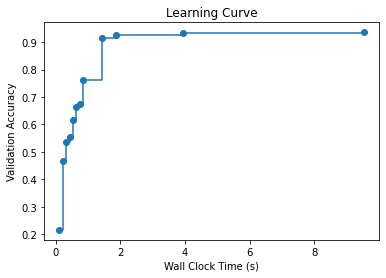

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()